In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

cid = '9bd795c636a349658fe3012f10ba1749'
secret = 'df3e514370964c3e80b48ca22912ff1d'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [2]:
user = sp.user('willfrank')
print(user)

{'display_name': 'willfrank', 'external_urls': {'spotify': 'https://open.spotify.com/user/willfrank'}, 'followers': {'href': None, 'total': 0}, 'href': 'https://api.spotify.com/v1/users/willfrank', 'id': 'willfrank', 'images': [], 'type': 'user', 'uri': 'spotify:user:willfrank'}


In [3]:
username = 'willfrank'
playlist_id = '6R5MJsUaXixLxpOZk5YXXV'

results = sp.user_playlist(username, playlist_id, 'tracks')
results

{'tracks': {'href': 'https://api.spotify.com/v1/playlists/6R5MJsUaXixLxpOZk5YXXV/tracks?offset=0&limit=100&additional_types=track',
  'items': [{'added_at': '2020-07-14T22:19:02Z',
    'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/wfrank698'},
     'href': 'https://api.spotify.com/v1/users/wfrank698',
     'id': 'wfrank698',
     'type': 'user',
     'uri': 'spotify:user:wfrank698'},
    'is_local': False,
    'primary_color': None,
    'track': {'album': {'album_type': 'album',
      'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0eDvMgVFoNV3TpwtrVCoTj'},
        'href': 'https://api.spotify.com/v1/artists/0eDvMgVFoNV3TpwtrVCoTj',
        'id': '0eDvMgVFoNV3TpwtrVCoTj',
        'name': 'Pop Smoke',
        'type': 'artist',
        'uri': 'spotify:artist:0eDvMgVFoNV3TpwtrVCoTj'}],
      'available_markets': ['AD',
       'AE',
       'AL',
       'AR',
       'AT',
       'AU',
       'BA',
       'BE',
       'BG',
       'BH',
 

In [4]:
playlist_tracks_data = results['tracks']
playlist_tracks_id = []
playlist_tracks_titles = []
playlist_tracks_artists = []
playlist_tracks_first_artists = []

for track in playlist_tracks_data['items']:
    playlist_tracks_id.append(track['track']['id'])
    playlist_tracks_titles.append(track['track']['name'])
    # adds a list of all artists involved in the song to the list of artists for the playlist
    artist_list = []
    for artist in track['track']['artists']:
        artist_list.append(artist['name'])
    playlist_tracks_artists.append(artist_list)
    playlist_tracks_first_artists.append(artist_list[0])

In [5]:
features = sp.audio_features(playlist_tracks_id)

In [6]:
import numpy as np
import pandas as pd

features_df = pd.DataFrame(data=features, columns=features[0].keys())

features_df['title'] = playlist_tracks_titles
features_df['first_artist'] = playlist_tracks_first_artists
features_df['all_artists'] = playlist_tracks_artists
#features_df = features_df.set_index('id')
features_df = features_df[['id', 'title', 'first_artist', 'all_artists',
                           'danceability', 'energy', 'key', 'loudness',
                           'mode', 'acousticness', 'instrumentalness',
                           'liveness', 'valence', 'tempo',
                           'duration_ms', 'time_signature']]
features_df.tail()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
82,5bUwUQKGNnTE20kb3MTqHD,Under Ground Kings,Drake,[Drake],0.487,0.712,8,-7.323,1,0.000052,0.000000,0.1980,0.3970,156.209,212613,4
83,1j6kDJttn6wbVyMaM42Nxm,Lord Pretty Flacko Jodye 2 (LPFJ2),A$AP Rocky,[A$AP Rocky],0.485,0.720,6,-5.991,1,0.012300,0.000000,0.0546,0.0471,207.982,126960,4
84,3X37NtwadSS0RM20dh2IgP,Worst Behavior,Drake,[Drake],0.777,0.778,9,-6.349,1,0.156000,0.000001,0.1960,0.4370,109.925,270200,4
85,71d7LaAgPcNcUopu3OzmP7,Make It Rain (feat. Rowdy Rebel),Pop Smoke,"[Pop Smoke, Rowdy Rebel]",0.500,0.767,1,-4.105,1,0.162000,0.000098,0.3850,0.5800,159.477,202443,4
86,7rSnKi58HPIVC0FVyh04Q1,Shake The Room (feat. Quavo),Pop Smoke,"[Pop Smoke, Quavo]",0.733,0.684,2,-4.748,1,0.142000,0.000000,0.1790,0.4370,142.040,165640,4


E:\Users\amira\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'Pop Smoke'),
  Text(1, 0, 'Future'),
  Text(2, 0, 'Jack Harlow'),
  Text(3, 0, 'DaBaby'),
  Text(4, 0, 'Lil Baby'),
  Text(5, 0, 'Polo G'),
  Text(6, 0, 'Lil Tjay'),
  Text(7, 0, 'JACKBOYS'),
  Text(8, 0, 'Meek Mill'),
  Text(9, 0, 'Lil Nas X'),
  Text(10, 0, 'Travis Scott'),
  Text(11, 0, 'Lil Uzi Vert'),
  Text(12, 0, 'Tory Lanez'),
  Text(13, 0, 'The Kid LAROI'),
  Text(14, 0, '6ix9ine'),
  Text(15, 0, 'Playboi Carti'),
  Text(16, 0, 'Marshmello'),
  Text(17, 0, 'NAV'),
  Text(18, 0, 'Lil Durk'),
  Text(19, 0, 'Migos'),
  Text(20, 0, 'Juice WRLD'),
  Text(21, 0, 'Childish Gambino'),
  Text(22, 0, 'Kanye West'),
  Text(23, 0, 'Drake'),
  Text(24, 0, 'Lil Wayne'),
  Text(25, 0, 'Mir Fontane'),
  Text(26, 0, 'A$AP Ferg'),
  Text(27, 0, 'Tyler, The Creato

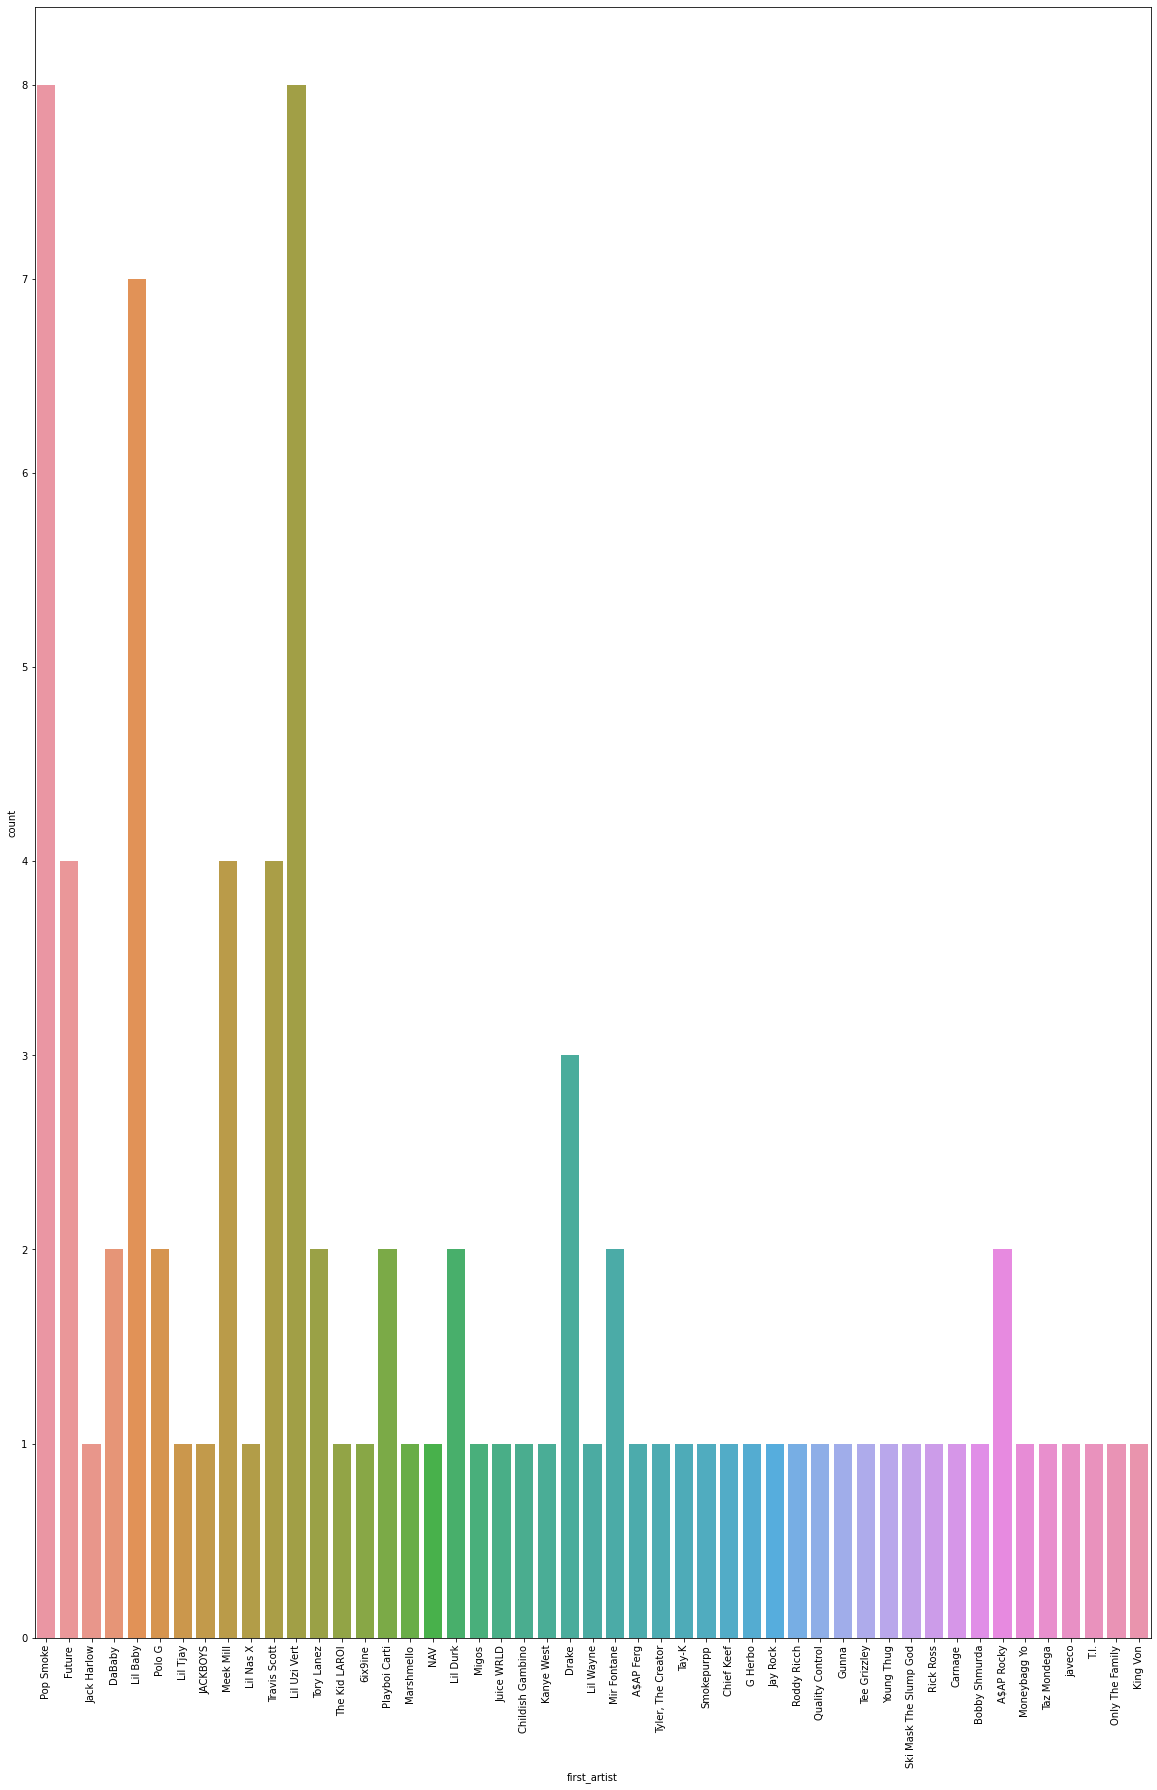

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(20,30))
sns.countplot(features_df['first_artist'])
plt.xticks(rotation=90)

In [8]:
features_df = features_df.drop(['first_artist', 'all_artists'], axis=1)
features_df.tail()

,id,title,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
82,5bUwUQKGNnTE20kb3MTqHD,Under Ground Kings,0.487,0.712,8,-7.323,1,0.000052,0.000000,0.1980,0.3970,156.209,212613,4
83,1j6kDJttn6wbVyMaM42Nxm,Lord Pretty Flacko Jodye 2 (LPFJ2),0.485,0.720,6,-5.991,1,0.012300,0.000000,0.0546,0.0471,207.982,126960,4
84,3X37NtwadSS0RM20dh2IgP,Worst Behavior,0.777,0.778,9,-6.349,1,0.156000,0.000001,0.1960,0.4370,109.925,270200,4
85,71d7LaAgPcNcUopu3OzmP7,Make It Rain (feat. Rowdy Rebel),0.500,0.767,1,-4.105,1,0.162000,0.000098,0.3850,0.5800,159.477,202443,4
86,7rSnKi58HPIVC0FVyh04Q1,Shake The Room (feat. Quavo),0.733,0.684,2,-4.748,1,0.142000,0.000000,0.1790,0.4370,142.040,165640,4


Text(0.5, 0, 'num_segments')

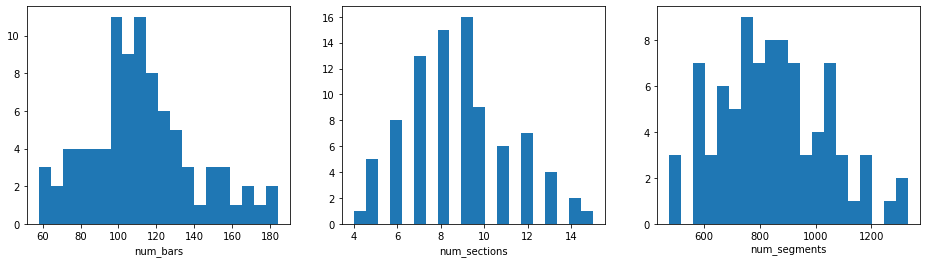

In [9]:
num_bars = []
num_sections = []
num_segments = []

for i in range(0,len(features_df['id'])):
    analysis = sp.audio_analysis(features_df.iloc[i]['id'])
    num_bars.append(len(analysis['bars'])) # beats/time_signature
    num_sections.append(len(analysis['sections']))
    num_segments.append(len(analysis['segments']))
    
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.hist(num_bars, bins=20)
plt.xlabel('num_bars')
plt.subplot(1,3,2)
plt.hist(num_sections, bins=20)
plt.xlabel('num_sections')
plt.subplot(1,3,3)
plt.hist(num_segments, bins=20)
plt.xlabel('num_segments')

In [10]:
features_df['num_bars'] = num_bars
features_df['num_sections'] = num_sections
features_df['num_segments'] = num_segments
features_df['user'] = username

features_df

,id,title,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments,user
0,25zlnOAzbVoOzIeXSvQFf1,Got It On Me,0.688,0.647,2,-7.258,1,0.008150,0.000017,0.0950,0.1950,88.834,164580,4,59,4,645,willfrank
1,740kQ8xwSGloumdiKR5Cwz,Trillionaire (feat. Youngboy Never Broke Again),0.768,0.526,0,-7.182,1,0.237000,0.000000,0.1390,0.4730,139.999,167552,4,96,8,657,willfrank
2,2MbdDtCv5LUVjYy9RuGTgC,"WHATS POPPIN (feat. DaBaby, Tory Lanez & Lil W...",0.904,0.723,11,-5.224,0,0.063100,0.000000,0.1850,0.8350,145.013,227478,4,136,10,1073,willfrank
3,3e39X4Q74yJzsYUEeyf4ws,OFF THE RIP,0.801,0.693,0,-4.002,1,0.010400,0.000000,0.3760,0.6020,164.084,115610,4,77,6,566,willfrank
4,6gxKUmycQX7uyMwJcweFjp,We Paid (feat. 42 Dugg),0.926,0.542,1,-5.064,1,0.135000,0.000000,0.0877,0.5640,135.140,181929,4,101,7,748,willfrank
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,5bUwUQKGNnTE20kb3MTqHD,Under Ground Kings,0.487,0.712,8,-7.323,1,0.000052,0.000000,0.1980,0.3970,156.209,212613,4,136,10,950,willfrank
83,1j6kDJttn6wbVyMaM42Nxm,Lord Pretty Flacko Jodye 2 (LPFJ2),0.485,0.720,6,-5.991,1,0.012300,0.000000,0.0546,0.0471,207.982,126960,4,105,5,497,willfrank
84,3X37NtwadSS0RM20dh2IgP,Worst Behavior,0.777,0.778,9,-6.349,1,0.156000,0.000001,0.1960,0.4370,109.925,270200,4,121,12,1179,willfrank
85,71d7LaAgPcNcUopu3OzmP7,Make It Rain (feat. Rowdy Rebel),0.500,0.767,1,-4.105,1,0.162000,0.000098,0.3850,0.5800,159.477,202443,4,127,9,925,willfrank


In [11]:
features_df.to_csv("hype_willfrank.csv", encoding='utf-8',index="false")